In [2]:
using XLSX
using Plots
using JLD

include("FCSeqTools.jl");
include("functions.jl");

In [3]:
dms = do_number_matrix_prot(do_letter_matrix("dms.faa"), 0.2);
gen = do_number_matrix_prot(do_letter_matrix("gen.faa"), 0.2);
nat = do_number_matrix_prot(do_letter_matrix("nat.faa"), 0.2);

wt_seq = nat[1,:];

## Reading Fasta

In [4]:
nat_MSA, nat_re, nat_E = read_fasta("nat.faa", 0.2);
gen_MSA, gen_re, gen_E = read_fasta("gen.faa", 0.2);
dms_MSA, dms_re, dms_E = read_fasta("dms.faa", 0.2);

L_nat = length(nat_MSA[:,1])
L_gen = length(gen_MSA[:,1])
L_dms = length(dms_MSA[:,1]);

# Energies of the DCA

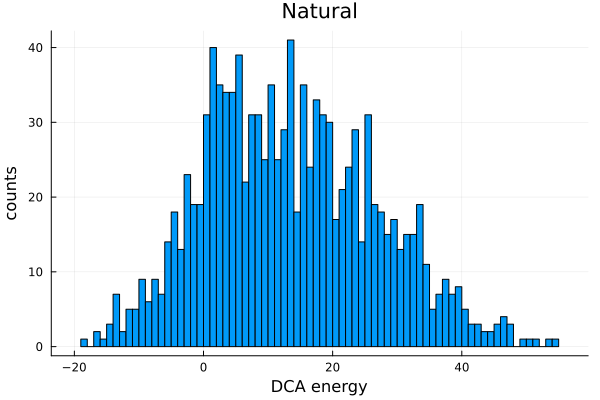

In [5]:
histogram(nat_E, bins=100, title= "Natural", xlabel="DCA energy", ylabel="counts", label=:false)

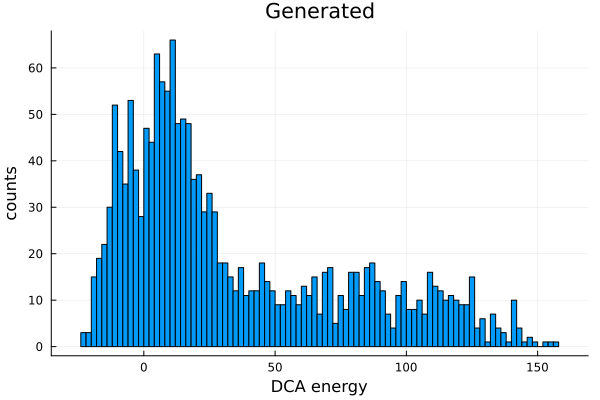

In [6]:
histogram(gen_E, bins=100, title= "Generated", xlabel="DCA energy", ylabel="counts", label =:false)

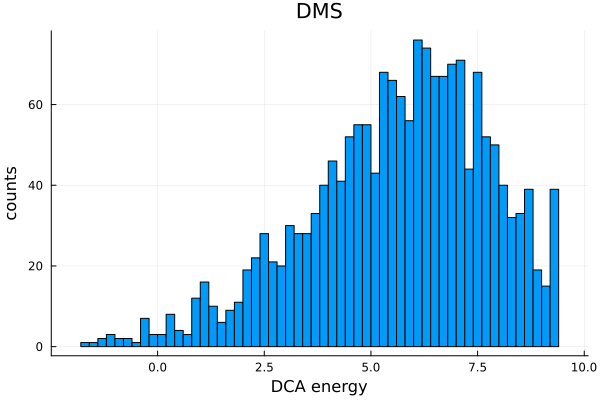

In [7]:
histogram(dms_E, bins=100, title= "DMS", xlabel="DCA energy", ylabel="counts", label=:false)

# Relative Enrichment

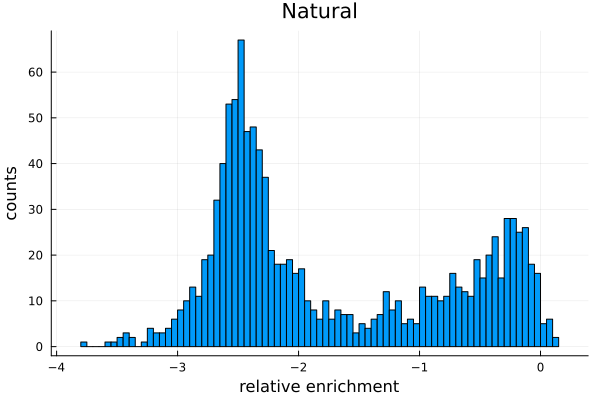

In [8]:
histogram(nat_re, bins=100, title= "Natural", xlabel="relative enrichment", ylabel="counts", label=:false)

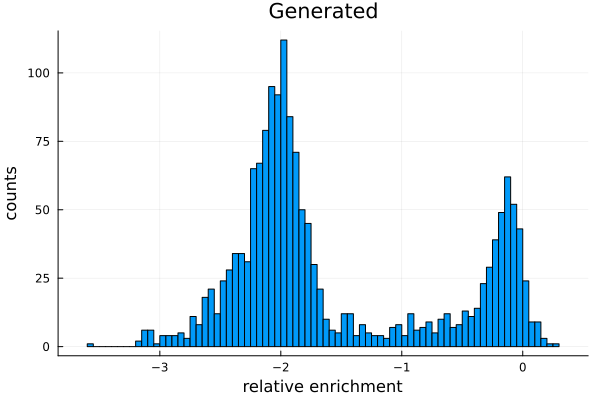

In [9]:
histogram(gen_re, bins=100, title= "Generated", xlabel="relative enrichment", ylabel="counts", label=:false)

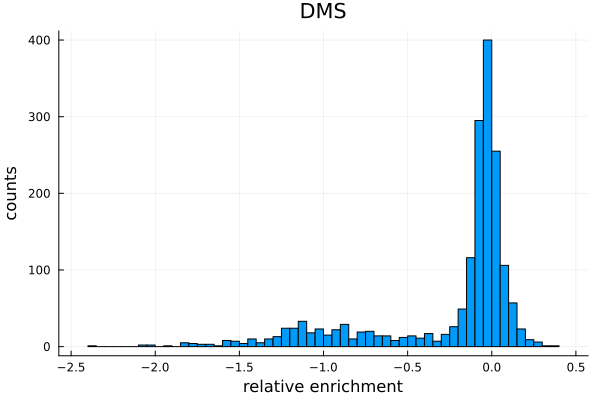

In [10]:
histogram(dms_re, bins=100, title= "DMS", xlabel="relative enrichment", ylabel="counts", label=:false)

# Comparison: DCA vs EAA

In [11]:
method = "cumulative"
fraction = 0.3
stop = 0.9
folder_name = method*string(fraction)*"_stop="*string(stop)

folder_name = folder_name * "_reg=0.5"
folder_path = "/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/"*folder_name*"/"  

fields_model = JLD.load(folder_path*"h.jld")["data"]
couplings_model = JLD.load(folder_path*"Jij.jld")["data"];

In [12]:
# WILD TYPE
q = 21
wt_freq = freq_single_point(wt_seq', q, 0.0) 
wt_fij = fij_two_point(wt_seq', q, 0.0)
wt_E = - sum(wt_fij .* couplings_model) - sum(wt_freq .* fields_model)
# MSAs
nat_model_energy = full_model_energy(q, fields_model, couplings_model, nat_MSA, L_nat);
gen_model_energy = full_model_energy(q, fields_model, couplings_model, gen_MSA, L_gen);
dms_model_energy = full_model_energy(q, fields_model, couplings_model, dms_MSA, L_dms);

In [13]:
# SUBTRACT WT ENERGY
nat_model_energy .-= wt_E
gen_model_energy .-= wt_E
dms_model_energy .-= wt_E;

In [14]:
using StatsBase

# correlations
print("Correlations over the NATURAL dataset \n")
print("\nDCA: Pearson(E,re): ", cor(nat_E, nat_re), ";   Spearman(E,re): ", corspearman(Float64.(nat_E), Float64.(nat_re)),";\n")
print("EAA: Pearson(E,re): ", cor(nat_model_energy, nat_re), ";   Spearman(E,re): ", corspearman(Float64.(nat_model_energy), Float64.(nat_re)),";\n\n")
print("DCA vs EAA: Pearson(E_DCA,E_EAA): ", cor(nat_E, nat_model_energy), ";   Spearman(E_DCA,E_EAA): ", corspearman(Float64.(nat_E), Float64.(nat_model_energy)),";\n")


Correlations over the NATURAL dataset 

DCA: Pearson(E,re): 0.04756017556687371;   Spearman(E,re): 0.035177801098107545;
EAA: Pearson(E,re): -0.09406489704454755;   Spearman(E,re): -0.09363810579417213;

DCA vs EAA: Pearson(E_DCA,E_EAA): 0.821717461084508;   Spearman(E_DCA,E_EAA): 0.8053098359869375;


In [15]:
# correlations
print("Correlations over the DMS dataset \n")
print("\nDCA: Pearson(E,re): ", cor(dms_E, dms_re), ";   Spearman(E,re): ", corspearman(Float64.(dms_E), Float64.(dms_re)),";\n")
print("EAA: Pearson(E,re): ", cor(dms_model_energy, dms_re), ";   Spearman(E,re): ", corspearman(Float64.(dms_model_energy), Float64.(dms_re)),";\n\n")

print("DCA vs EAA: Pearson(E_DCA,E_EAA): ", cor(dms_E, dms_model_energy), ";   Spearman(E_DCA,E_EAA): ", corspearman(Float64.(dms_E), Float64.(dms_model_energy)),";\n")


Correlations over the DMS dataset 

DCA: Pearson(E,re): -0.39714540790230124;   Spearman(E,re): -0.3160540444689717;
EAA: Pearson(E,re): -0.13999389385721653;   Spearman(E,re): -0.1389185829114112;

DCA vs EAA: Pearson(E_DCA,E_EAA): 0.6617418188629163;   Spearman(E_DCA,E_EAA): 0.6977746846363145;


In [16]:
# correlations
print("Correlations over the GENERATED dataset \n")
print("DCA: Pearson(E,re): ", cor(gen_E, gen_re), ";   Spearman(E,re): ", corspearman(Float64.(gen_E), Float64.(gen_re)),";\n")
print("EAA: Pearson(E,re): ", cor(gen_model_energy, gen_re), ";   Spearman(E,re): ", corspearman(Float64.(gen_model_energy), Float64.(gen_re)),";\n\n")

print("DCA vs EAA: Pearson(E_DCA,E_EAA): ", cor(gen_E, gen_model_energy), ";   Spearman(E_DCA,E_EAA): ", corspearman(Float64.(gen_E), Float64.(gen_model_energy)),";\n")


Correlations over the GENERATED dataset 
DCA: Pearson(E,re): -0.4365373906934347;   Spearman(E,re): -0.40938012155808373;
EAA: Pearson(E,re): -0.42683608175743637;   Spearman(E,re): -0.4097087208579004;

DCA vs EAA: Pearson(E_DCA,E_EAA): 0.9594353691495073;   Spearman(E_DCA,E_EAA): 0.9348339538723964;


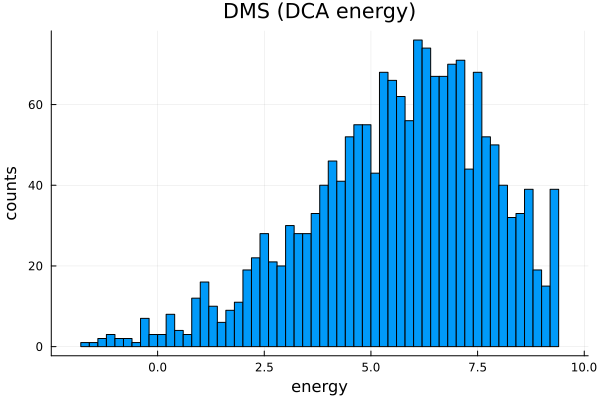

In [17]:
histogram(dms_E, bins=100, title= "DMS (DCA energy)", xlabel="energy", ylabel="counts", label=:false)

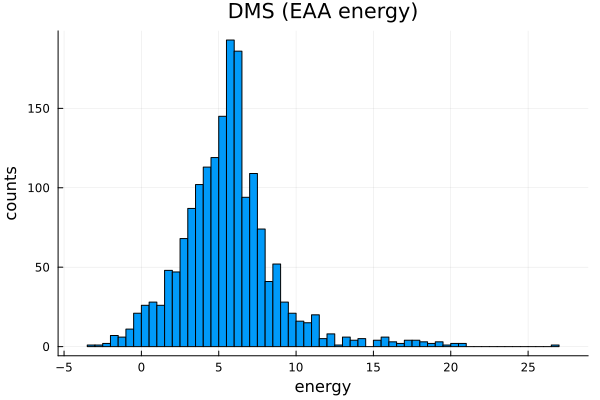

In [18]:
histogram(dms_model_energy, bins=100, title= "DMS (EAA energy)", xlabel="energy", ylabel="counts", label=:false)

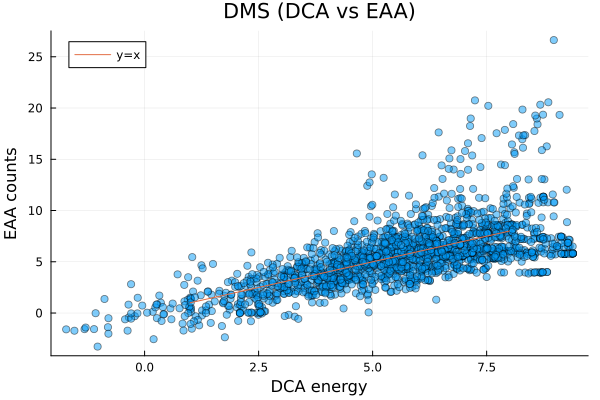

In [19]:
scatter(dms_E, dms_model_energy, alpha=0.5, title= "DMS (DCA vs EAA)", xlabel="DCA energy", ylabel="EAA counts", label=:false)
x = [1,5,8]
y = x
plot!(x, y, label= "y=x")
#savefig("scatter_energy_DCA_vs_EAA_reg.png")


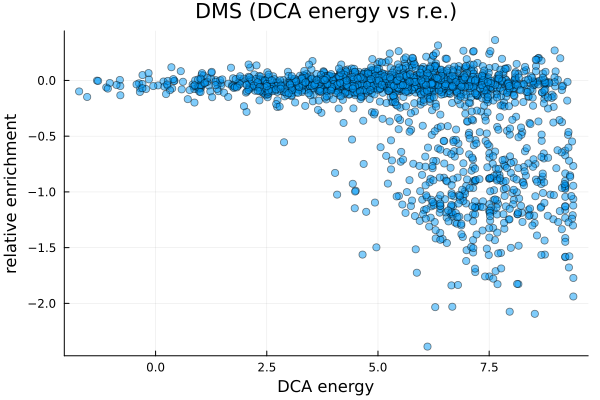

In [20]:
scatter(dms_E, dms_re, alpha=0.5, title= "DMS (DCA energy vs r.e.)", xlabel="DCA energy", ylabel="relative enrichment", label=:false)
#savefig("scatter_energy_DCA_vs_RE_reg.png")

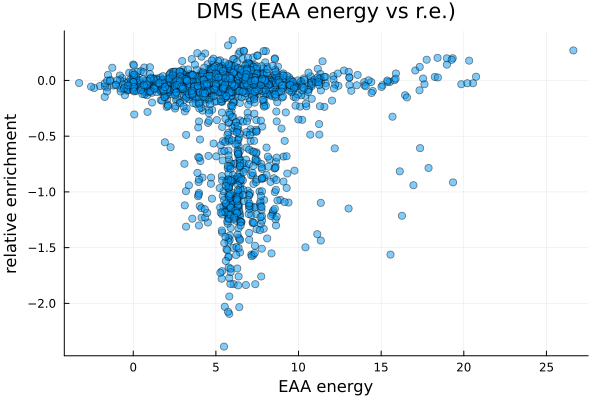

In [21]:
scatter(dms_model_energy, dms_re, alpha=0.5, title= "DMS (EAA energy vs r.e.)", xlabel="EAA energy", ylabel="relative enrichment", label=:false)
#savefig("scatter_energy_EAA_vs_RE_reg.png")

# EAA couplings and fields histograms

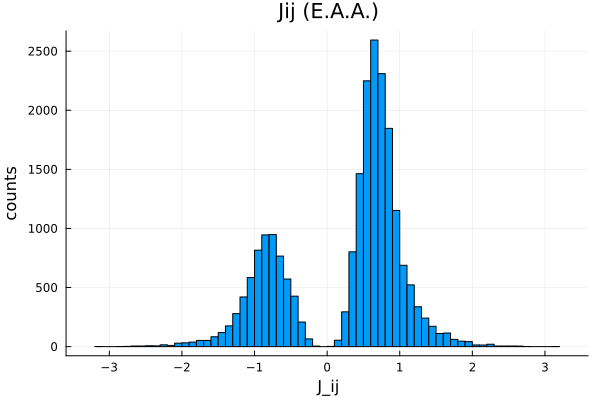

In [22]:
histogram(vec(couplings_model)[vec(couplings_model).!=0], title= "Jij (E.A.A.)", xlabel="J_ij", ylabel="counts", label=:false)


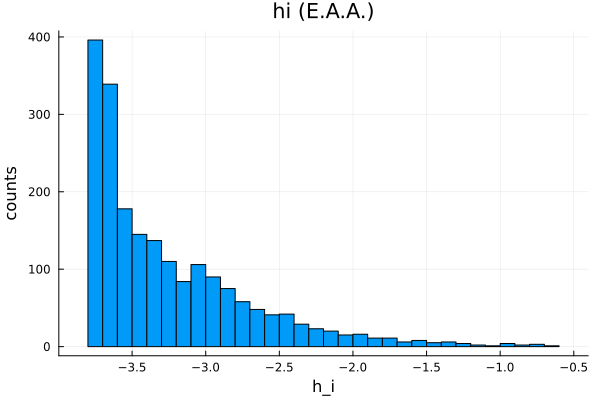

In [25]:
histogram(fields_model, title= "hi (E.A.A.)", xlabel="h_i", ylabel="counts", label=:false, bins = 40)
#savefig("hi_reg.png")

## Tests on Deep Mutational Scanning dataset

In [24]:
# CREA UN FULL DMS MSA E CI CALCOLA LE ENERGIE MEDIE PER OGNI POSIZIONE
function mutation_MSA(q, seq, fields, couplings)
    MSA_mut1 = []
    DMS_ave_energy = []
    push!(MSA_mut1, seq)
    c = 0
    for i in seq
        c += 1
        if i != q
            energy = 0.0
            for a in 1:q - 1
                if a != i 
                    new_seq = copy(seq)
                    new_seq[c] = a
                    energy += - sum(fij_two_point(new_seq', q, 0.0) .* couplings) - sum(freq_single_point(new_seq', q, 0.0) .* fields)
                    push!(MSA_mut1, new_seq)
                end
            end
            push!(DMS_ave_energy, energy/19)
        end
    end

    L_MSA = length(MSA_mut1)
    L_prot = length(MSA_mut1[1])

    MSA_mut = Array{Int64}(undef, L_MSA, L_prot)
    for i in 1:L_MSA
        for j in 1:L_prot
        MSA_mut[i, j] = MSA_mut1[i][j]
        end

    end
    return MSA_mut, DMS_ave_energy
end

# DATO UN DMS MSA CALCOLA LE ENERGIE CON I PARAMETRI FORNITI
function compute_dms_ave_energies(q, MSA, wt_seq, fields, couplings)
    L = length(MSA[1,:])
    energies = zeros(L)
    count = zeros(L)

    freq = freq_single_point(wt_seq', q, 0.0) 
    fij = fij_two_point(wt_seq', q, 0.0)
    wt_ene = - sum(fij .* couplings) - sum(freq .* fields)

    for m in 1:length(MSA[:, 1])
        seq = MSA[m,:]
        i = 1
        flag = false
        while flag == false
            if seq[i] != wt_seq[i] 
                flag = true
            else
                i += 1
            end
        end
        freq = freq_single_point(seq', q, 0.0) 
        fij = fij_two_point(seq', q, 0.0)
        energies[i] += - sum(fij .* couplings) - sum(freq .* fields)
        count[i] += 1
    end
    ave_energies = []

    for i in 1:L
        if energies[i] != 0.0
            push!(ave_energies, energies[i] / count[i])
        end
    end
    return ave_energies
end

# DATO L'MSA DMS DI MARTIN, CALCOLA LE ENERGIE MEDIE DEL LORO MODELLO
function martin_compute_dms_ave_energies(q, MSA, wt_seq, MSA_E)
    L = length(MSA[1,:])
    energies = zeros(L)
    count = zeros(L)
    for m in 1:length(MSA[:, 1])
        seq = MSA[m,:]
        i = 1
        flag = false
        while flag == false
            if seq[i] != wt_seq[i] 
                flag = true
            else
                i += 1
            end
        end
        freq = freq_single_point(seq', q, 0.0) 
        fij = fij_two_point(seq', q, 0.0)
        energies[i] += MSA_E[m]
        count[i] += 1
    end
    ave_energies = []

    for i in 1:L
        if energies[i] != 0.0
            push!(ave_energies, energies[i] / count[i])
        end
    end
    return ave_energies
end

martin_compute_dms_ave_energies (generic function with 1 method)

In [25]:
MSA_dms, dms_ave_energies = mutation_MSA(q, wt_seq, fields_model, couplings_model);

In [26]:
MSA_dms, profile_dms_ave_energies = mutation_MSA(q, wt_seq, fields_model, 0 .*couplings_model);

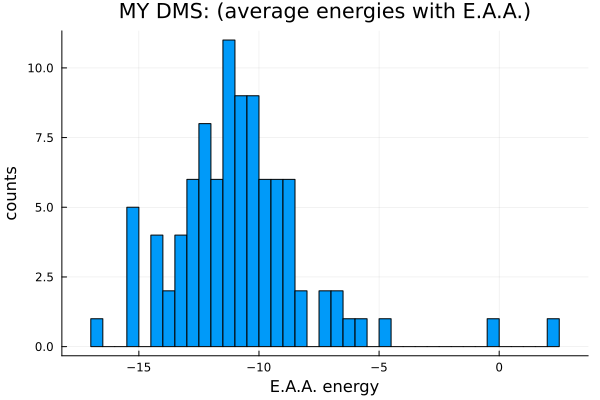

In [27]:
histogram(dms_ave_energies, title= "MY DMS: (average energies with E.A.A.)", xlabel="E.A.A. energy", ylabel="counts", label=:false, bins = 40)

In [26]:
histogram(profile_dms_ave_energies, title= "MY DMS: (average energies with Profile)", xlabel="Profile energy", ylabel="counts", label=:false, bins = 20)

LoadError: UndefVarError: profile_dms_ave_energies not defined

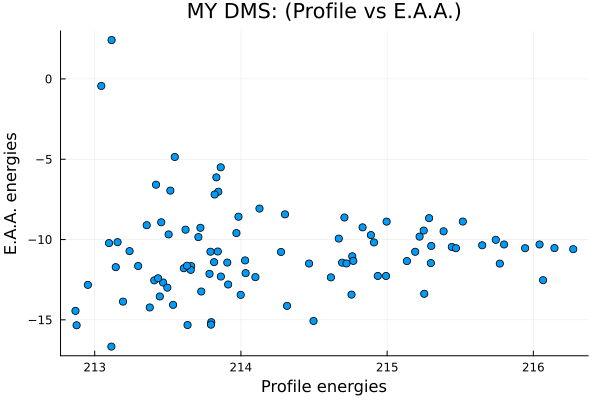

In [29]:
scatter(profile_dms_ave_energies, dms_ave_energies, title= "MY DMS: (Profile vs E.A.A.)", xlabel="Profile energies", ylabel="E.A.A. energies", label=:false,)

In [30]:
giv_DMS_prof_energies = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model, 0 .* couplings_model);

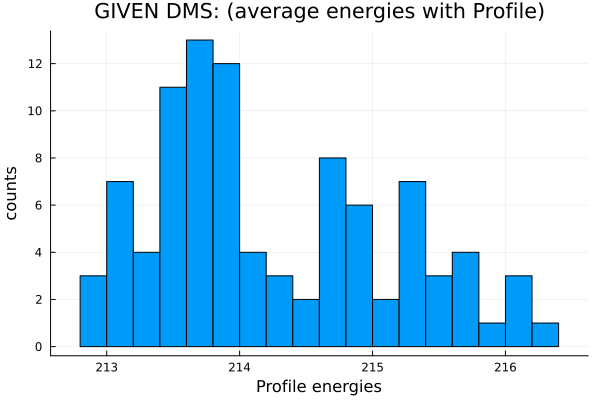

In [62]:
histogram(giv_DMS_prof_energies, title= "GIVEN DMS: (average energies with Profile)", xlabel="Profile energies", ylabel="counts", label=:false, bins = 30)
#savefig("profile_hist_reg.png")

In [32]:
giv_DMS_EAA_energies = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model, couplings_model);

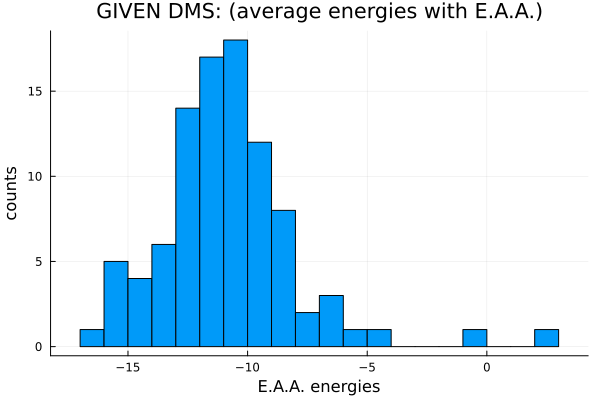

In [63]:
histogram(giv_DMS_EAA_energies, title="GIVEN DMS: (average energies with E.A.A.)", xlabel="E.A.A. energies", ylabel="counts", label=:false, bins = 30)
#savefig("EAA_hist_reg.png")

In [34]:
giv_MSA_martin_energies = martin_compute_dms_ave_energies(q, dms_MSA, wt_seq, dms_E);

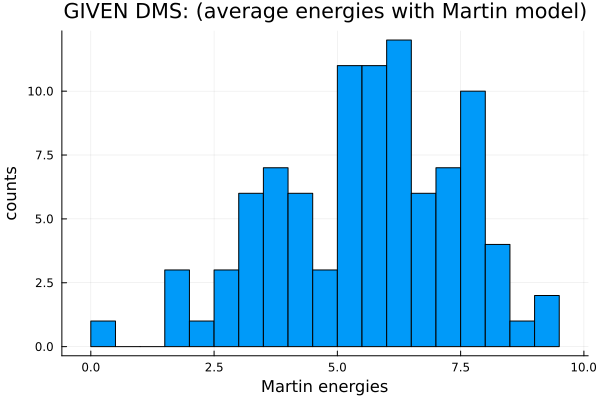

In [35]:
histogram(giv_MSA_martin_energies, title = "GIVEN DMS: (average energies with Martin model)", xlabel="Martin energies", ylabel="counts", label=:false, bins = 40)

In [64]:
# correlations
print("Correlations over the DMS dataset \n")

print("DCA vs EAA: Pearson(E_DCA,E_EAA): ", cor(giv_MSA_martin_energies, giv_DMS_EAA_energies), ";   Spearman(E_DCA,E_EAA): ", corspearman(Float64.(giv_MSA_martin_energies),Float64.(giv_DMS_EAA_energies)),";\n")


Correlations over the DMS dataset 
DCA vs EAA: Pearson(E_DCA,E_EAA): 0.6643107350183162;   Spearman(E_DCA,E_EAA): 0.7223277823935267;


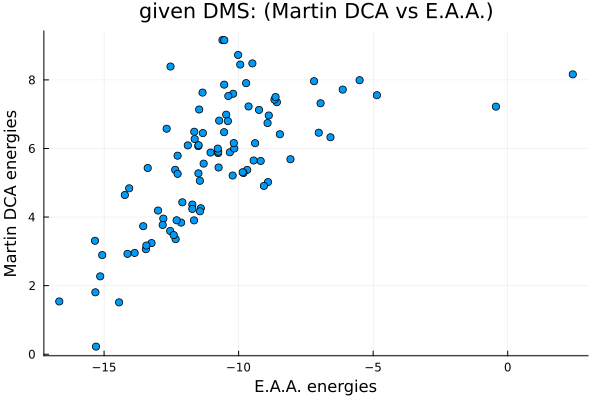

In [37]:

scatter(giv_DMS_EAA_energies, giv_MSA_martin_energies, title= "given DMS: (Martin DCA vs E.A.A.)", xlabel="E.A.A. energies", ylabel="Martin DCA energies", label=:false,)

In [38]:
fields_model_03 = JLD.load("h_0.3.jld")["data"]
couplings_model_03 = JLD.load("Jij_0.3.jld")["data"];

fields_model_04 = JLD.load("h_0.4.jld")["data"]
couplings_model_04 = JLD.load("Jij_0.4.jld")["data"];

fields_model_05 = JLD.load("h_0.5.jld")["data"]
couplings_model_05 = JLD.load("Jij_0.5.jld")["data"];

fields_model_06 = JLD.load("h_0.6.jld")["data"]
couplings_model_06 = JLD.load("Jij_0.6.jld")["data"];

fields_model_07 = JLD.load("h_0.7.jld")["data"]
couplings_model_07 = JLD.load("Jij_0.7.jld")["data"];

fields_model_08 = JLD.load("h_0.8.jld")["data"]
couplings_model_08 = JLD.load("Jij_0.8.jld")["data"];

fields_model_09 = JLD.load("h_0.8.jld")["data"]
couplings_model_09 = JLD.load("Jij_0.8.jld")["data"];

fields_model_095 = JLD.load("h_0.3_stop90_reg.jld")["data"]
couplings_model_095 = JLD.load("Jij_0.3_stop90_reg.jld")["data"];

In [39]:
full_energies_03 = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model_03, couplings_model_03);
full_energies_04 = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model_04, couplings_model_04);
full_energies_05 = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model_05, couplings_model_05);
full_energies_06 = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model_06, couplings_model_06);
full_energies_07 = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model_07, couplings_model_07);
full_energies_08 = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model_08, couplings_model_08);
full_energies_09 = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model_08, couplings_model_08);
full_energies_095 = compute_dms_ave_energies(q, dms_MSA, wt_seq, fields_model_095, couplings_model_095);

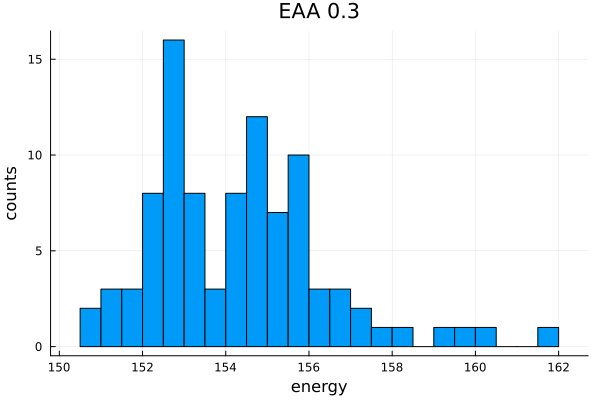

In [40]:
histogram(full_energies_03, title= "EAA 0.3", xlabel="energy", ylabel="counts", label=:false, bins = 30)

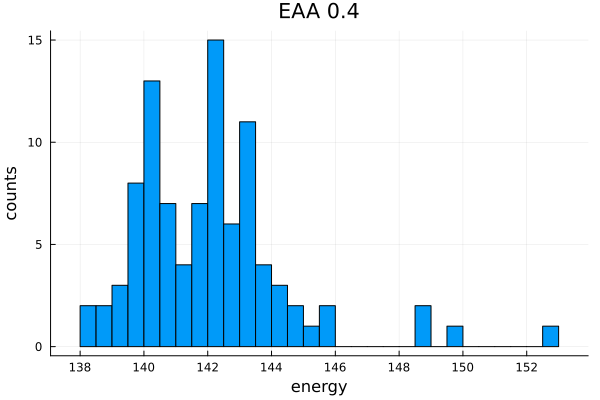

In [41]:
histogram(full_energies_04, title= "EAA 0.4", xlabel="energy", ylabel="counts", label=:false, bins = 30)

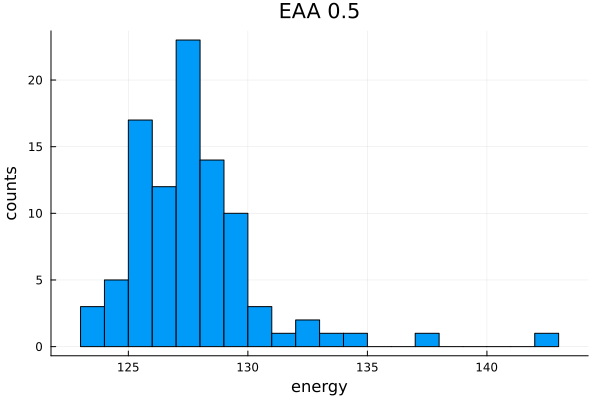

In [42]:
histogram(full_energies_05, title= "EAA 0.5", xlabel="energy", ylabel="counts", label=:false, bins = 30)

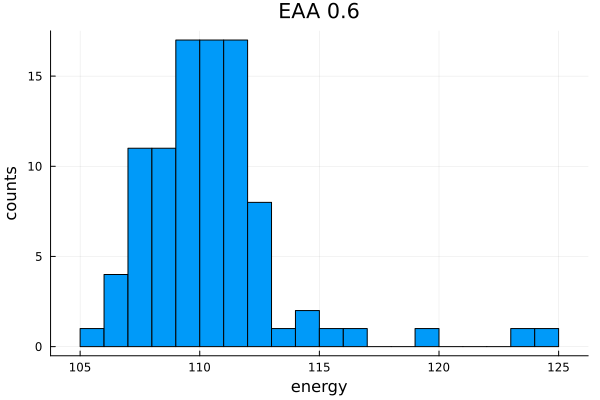

In [43]:
histogram(full_energies_06, title= "EAA 0.6", xlabel="energy", ylabel="counts", label=:false, bins = 30)

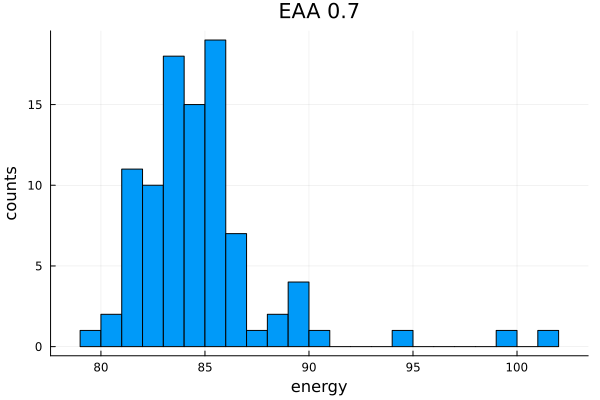

In [44]:
histogram(full_energies_07, title= "EAA 0.7", xlabel="energy", ylabel="counts", label=:false, bins = 30)

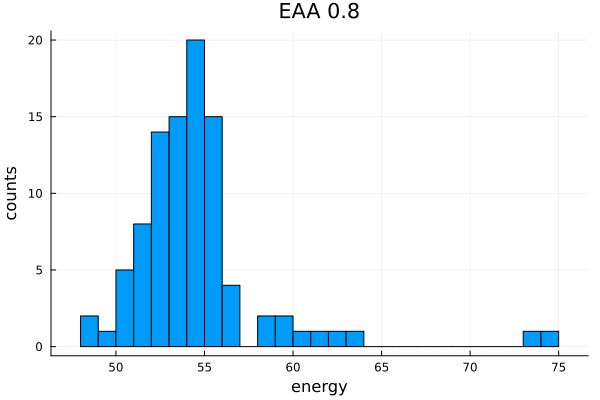

In [45]:
histogram(full_energies_08, title= "EAA 0.8", xlabel="energy", ylabel="counts", label=:false, bins = 30)

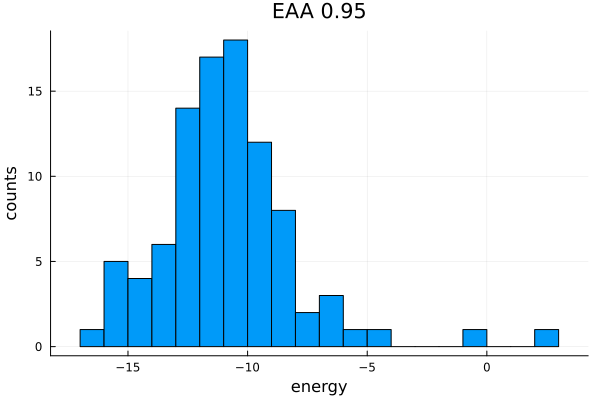

In [46]:
histogram(full_energies_095, title= "EAA 0.95", xlabel="energy", ylabel="counts", label=:false, bins = 30)

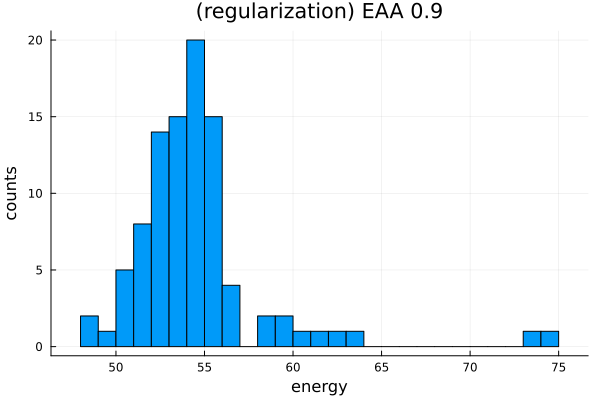

In [47]:
# with regularization
histogram(full_energies_09, title= "(regularization) EAA 0.9", xlabel="energy", ylabel="counts", label=:false, bins = 30)